In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

data_root = "/home/arefmalek/Desktop/Learning_Projects/mnist/data"
mnist_trainset = torchvision.datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

In [8]:
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=4,
                                         shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [9]:
import numpy as np

classes = np.arange(10)
classes.reshape(-1, )

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

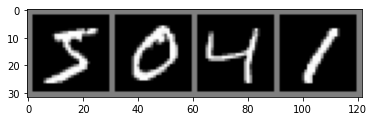

tensor([5, 0, 4, 1])


In [10]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap = "gray")
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [21]:
import torch.nn as nn
import torch.nn.functional as F

#image dimensions - 1 x 28 x 28
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 4)# 
        self.pool = nn.MaxPool2d(2, 2)# we're picking out the highest value in each kernel we pass over
        self.conv2 = nn.Conv2d(6, 16, 4)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)# 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

net = Net()

In [22]:
print(images.shape)
print(net(images))
print(labels)

torch.Size([4, 1, 28, 28])
tensor([[ 0.0128,  0.0478,  0.1216, -0.0475, -0.0572, -0.0678, -0.0125, -0.0292,
         -0.0127,  0.0546],
        [ 0.0137,  0.0319,  0.1168, -0.0411, -0.0660, -0.0761, -0.0099, -0.0320,
         -0.0048,  0.0506],
        [ 0.0192,  0.0673,  0.1169, -0.0377, -0.0603, -0.0526, -0.0051, -0.0332,
         -0.0128,  0.0755],
        [-0.0066,  0.0608,  0.1252, -0.0271, -0.0632, -0.0619, -0.0128, -0.0340,
         -0.0200,  0.0652]], grad_fn=<AddmmBackward>)
tensor([5, 0, 4, 1])


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zeroing out the gradient because we don't want the values from the previous guess (network doesn't really learn then)
        optimizer.zero_grad()
# [0.01, 0.01, 0.54, ...., ] [0, 0,0,1,0]
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

NameError: name 'trainloader' is not defined

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))